# Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data

In [2]:
# Creating a Path
path = r'/Users/jacob/Desktop/Instacart Basket Analysis'

In [3]:
# Importing ords_prods_customers_merged dataframe
df_ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merged.pkl'))

In [17]:
df_ords_prods_customers.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,fam_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Mid-range product,Regularly busy,Busiest days,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer
2,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Mid-range product,Regularly busy,Regularly busy,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Mid-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Mid-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer
5,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Mid-range product,Regularly busy,Regularly busy,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer


# Visualizations

## 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

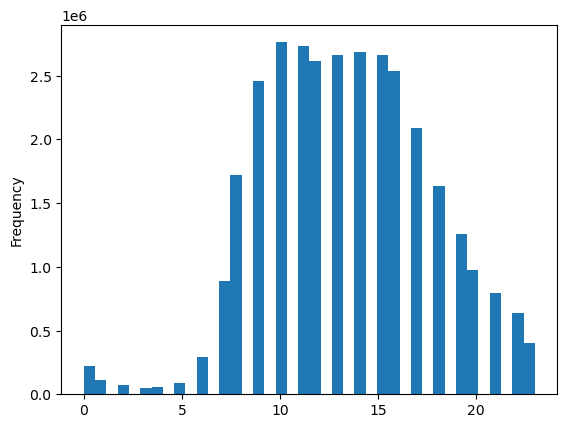

In [30]:
# Histogram 'order_hour_of_day' 
hist = df_ords_prods_customers['order_hour_of_day'].plot.hist(bins = 40)

#### When examining this histogram, it becomes evident that the busiest hours for placing orders on Instacart typically occur between 9 AM and 4 PM, representing the peak of customer activity. Subsequently, there is a gradual decline in order frequency starting from 5 PM and continuing throughout the night. Interestingly, there is a minor uptick in orders around midnight, but this is followed by another lull until approximately 5 or 6 AM when order volume begins to rise once more. This data reveals distinct patterns in user behavior, with a clear preference for daytime shopping and occasional late-night or early-morning orders.

## 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

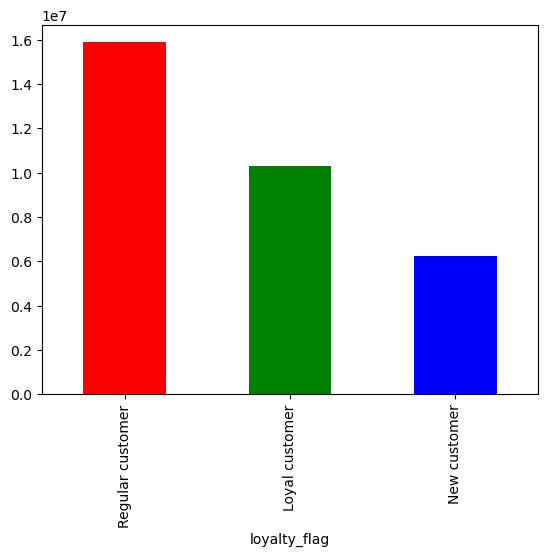

In [32]:
# Bar Chart 'loyalty_flag'
bar = df_ords_prods_customers['loyalty_flag'].value_counts().plot.bar(color = ['red', 'green',  'blue'])

#### The backbone of Instacart's customer base predominantly comprises regular customers. These loyal patrons play a pivotal role in sustaining the platform's success and growth. Their consistent engagement and recurring orders not only contribute to Instacart's revenue but also underscore the trust and satisfaction they find in the service. By catering to the needs and preferences of these regular customers, Instacart ensures a stable and reliable source of business, highlighting the importance of building strong, ongoing relationships with its most frequent users.

## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

### Sampling Data

In [12]:
# Create a list holding True/False values to the test np.random.ran <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_customers)) <= 0.7

### Split the dataframe into two Samples

In [13]:
# Store 70% of the Sample in the Dataframe "big"
big = df_ords_prods_customers[dev]

In [14]:
# Store 30% of the Sample in the Dataframe "small"
small = df_ords_prods_customers[~dev]

In [18]:
# Reducing the 'small' sample to only the columns necessary for the chart, namely “prices” and “orders_day_of_week"
df_2 = small[['order_hour_of_day','prices']]

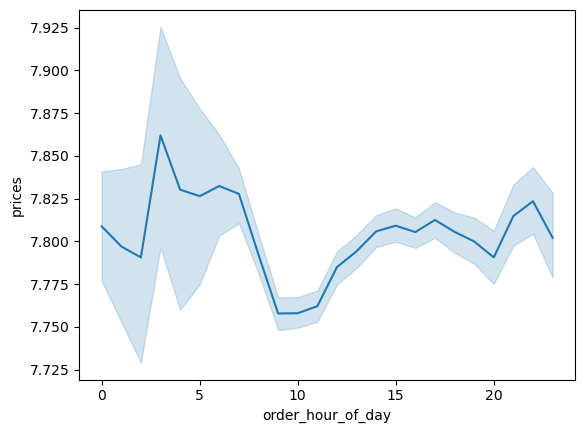

In [19]:
# Creating the Line Chart for the 'small' Sample
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [20]:
# Reducing the 'big' sample to only the columns necessary for the chart, namely “prices” and “orders_day_of_week"
df_3 = big[['order_hour_of_day','prices']]

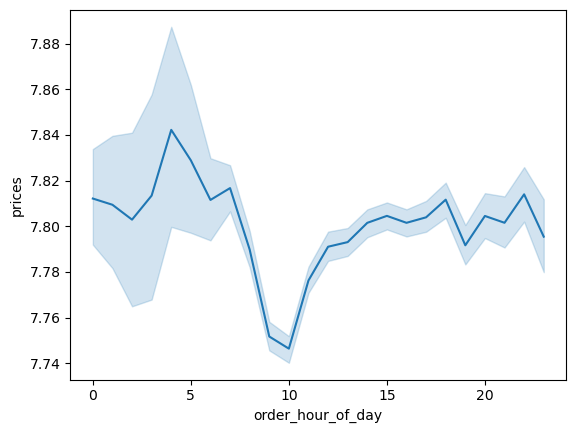

In [21]:
# Creating the Line Chart for the 'small' Sample
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

## 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [22]:
# Reducing the 'small' sample to only the columns necessary for the chart, namely “age” and “number_of_dependants"
df_4 = small[['age','number_of_dependants']]

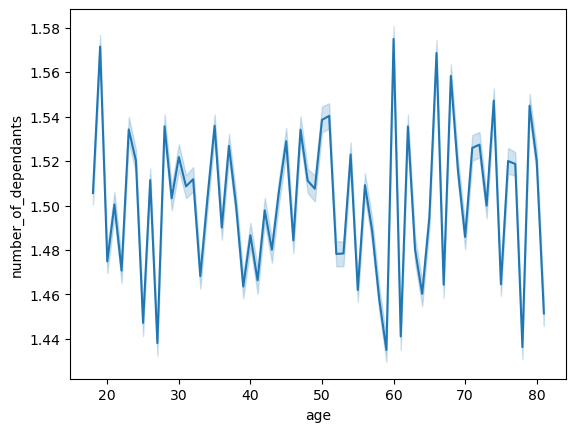

In [23]:
# Creating the Line Chart for the 'small' Sample
line_3 = sns.lineplot(data = df_4, x = 'age',y = 'number_of_dependants')

In [24]:
# Reducing the 'big' sample to only the columns necessary for the chart, namely “age” and “number_of_dependants"
df_5 = big[['age','number_of_dependants']]

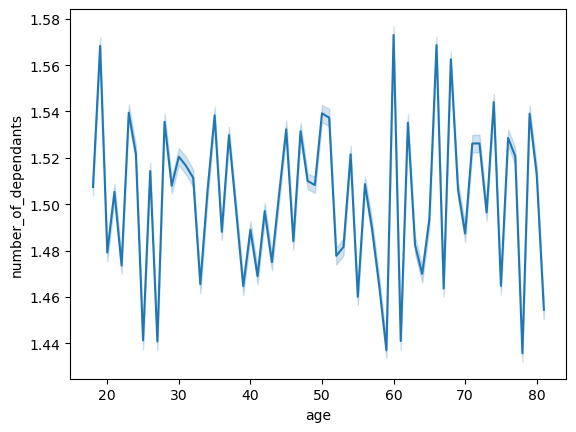

In [25]:
# Creating the Line Chart for the 'big' Sample
line_4 = sns.lineplot(data = df_5, x = 'age',y = 'number_of_dependants')

#### There's no connection between the number of dependants and age. 

## 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

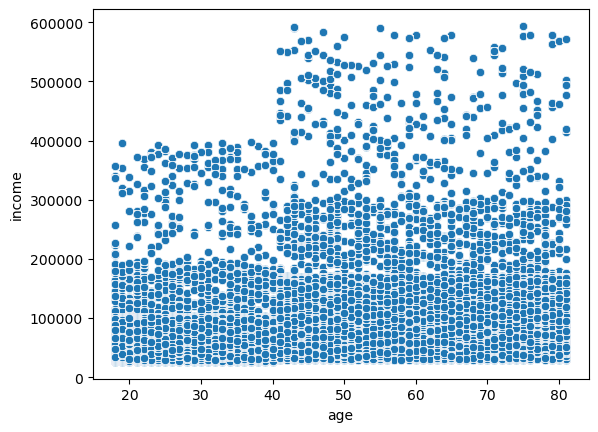

In [33]:
# Scatterplot
scatter = sns.scatterplot(x = 'age', y = 'income',data = df_ords_prods_customers)

#### From 40 years old the income surpass 400,000. 

# Exporting Visualizations

In [34]:
# Exporting the Visualization Histogram 'order_hour_of_day' outside of Jupyter
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ohod.png'))

In [35]:
# Exporting the Visualization Bar Chart 'loyalty_flag' outside of Jupyter
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [36]:
# Exporting the Visualization Line Chart 'prices' vs 'order_hour_of_day' outside of Jupyter (small sample)
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_ohod_small.png'))

In [37]:
# Exporting the Visualization Line Chart 'prices' vs 'order_hour_of_day' outside of Jupyter (big sample)
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_ohod_big.png'))

In [38]:
# Exporting the Visualization Line Chart 'age' vs 'number_of_dependants' outside of Jupyter (small sample) 
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_nod_small.png'))

In [39]:
# Exporting the Visualization Line Chart 'age' vs 'number_of_dependants' outside of Jupyter (big sample) 
line_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_nod_big.png'))

In [40]:
# Exporting the Visualization Scatterplot 'age' vs 'income' outside of Jupyter
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))